In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Load the Keras model (assuming it's already loaded or saved as braintumer.h5)
# If the model is already in memory, you can skip load_model and use the 'model' object directly
model_path = ""
loaded_model = load_model(model_path)

# Define the path for the pickle file
pickle_file_path = "/content/drive/MyDrive/brain_tumor_dataset/train/braintumer_model.pkl"

# Save the model as a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(loaded_model, f)

print(f"Model saved successfully as pickle file at: {pickle_file_path}")

Model saved successfully as pickle file at: /content/drive/MyDrive/brain_tumor_dataset/train/braintumer_model.pkl


In [ ]:
from google.colab import files

# Download the pickle file
files.download("/content/drive/MyDrive/brain_tumor_dataset/train/braintumer_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Img_size=224
batch_size=32

In [ ]:
train_datagen = ImageDataGenerator(
rescale=1.0/255,
validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/archive (1)/brain_tumor_dataset",
    target_size=(Img_size,Img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 915 images belonging to 2 classes.


In [ ]:
import os

directory_path = "/content/drive/MyDrive/archive (1)/brain_tumor_dataset"
if os.path.isdir(directory_path):
    print(f"The directory '{directory_path}' exists.")
else:
    print(f"The directory '{directory_path}' does not exist.")

The directory '/content/drive/MyDrive/archive (1)/brain_tumor_dataset' exists.


In [ ]:
val_generator=train_datagen.flow_from_directory(
"/content/drive/MyDrive/archive (1)/brain_tumor_dataset",
target_size=(Img_size,Img_size),
batch_size=batch_size,
class_mode='binary',
subset='training'
)

Found 915 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Img_size, Img_size, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=batch_size)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 289s 10s/step - accuracy: 0.6423 - loss: 0.8487 - val_accuracy: 0.7115 - val_loss: 0.5072
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.7617 - loss: 0.4713 - val_accuracy: 0.7891 - val_loss: 0.3983
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.8354 - loss: 0.3534 - val_accuracy: 0.8962 - val_loss: 0.2643
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9011 - loss: 0.2343 - val_accuracy: 0.9497 - val_loss: 0.1463
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9425 - loss: 0.1612 - val_accuracy: 0.9891 - val_loss: 0.0646


In [ ]:
model.save("/content/drive/MyDrive/brain_tumor_dataset/train/braintumer.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/brain_tumor_dataset/train/braintumer.h5")
print("model loaded")

model loaded


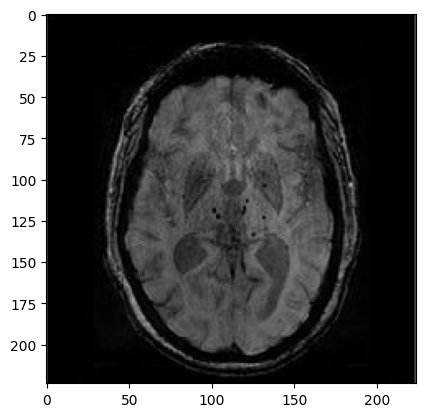

In [ ]:
test_image_path="/content/drive/MyDrive/N1428.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [ ]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
[[0.01778934]]


In [ ]:
if prediction > 0.5:
    print("tumor detected")
else:
    print("no tumor detected")

no tumor detected


In [ ]:
from google.colab import files

# Download the h5 file
files.download("/content/drive/MyDrive/brain_tumor_dataset/train/braintumer.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>